In [1]:
from pgnano.stats_analysis.primitives import Histogram, PGPoreType
from pgnano.stats_analysis.jupyter_data_preparation import flatten_sample_data
from typing import Callable, List, Iterable, Tuple
from functools import partial
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt

In [2]:
signal_data, chunk_data = flatten_sample_data(PGPoreType.P10_4_1,100)

['/data/datananoraw/data_analysis/10_4_1/2d6ce589-PAG70058_pass_90cff557_229fb1c2_1643.pod5', '/data/datananoraw/data_analysis/10_4_1/58662236-PAG70133_pass_976dfe21_5dadfada_5.pod5', '/data/datananoraw/data_analysis/10_4_1/679e8449-PAG70058_pass_90cff557_229fb1c2_1581.pod5', '/data/datananoraw/data_analysis/10_4_1/7646a9e4-PAG65784_pass_f306681d_16a70748_508.pod5', '/data/datananoraw/data_analysis/10_4_1/889add85-PAG67404_fail_a8a15ce6_4a74c11f_28.pod5', '/data/datananoraw/data_analysis/10_4_1/898fa111-PAG68757_fail_39c39833_26077d5d_167.pod5', '/data/datananoraw/data_analysis/10_4_1/8ba56eeb-PAG65784_pass_f306681d_16a70748_1319.pod5', '/data/datananoraw/data_analysis/10_4_1/a60ded57-PAG65902_pass_96491aed_0156c9a3_1335.pod5', '/data/datananoraw/data_analysis/10_4_1/a7ff4244-PAG68757_pass_39c39833_26077d5d_944.pod5', '/data/datananoraw/data_analysis/10_4_1/af5d6be7-PAG70133_pass_976dfe21_5dadfada_1065.pod5', '/data/datananoraw/data_analysis/10_4_1/c2f433b8-PAG65902_fail_96491aed_0156c

In [3]:
def transform_signal_to_error(signal: npt.NDArray[np.int16]) -> npt.NDArray[np.int16]:
    prediction = np.append([0], np.copy(signal[:-1]))
    assert(len(prediction) == len(signal))
    return signal - prediction

In [4]:
def transform_error_to_code(error: npt.NDArray[np.int16]) -> npt.NDArray[np.uint16]:
    vectorized = np.vectorize(lambda x: 2*x if x > 0 else (-(2*x)-1))
    return vectorized(error)

In [5]:
def split_symbol(x: np.int16, bit: np.integer) -> Tuple[np.int16]:
    low_mask: np.int16
    low_mask = (np.int16(1) << bit) - 1
    high_mask: np.int16
    high_mask = np.int16(0xFFFF) ^ low_mask
    return x & low_mask, (x & high_mask) >> bit

In [6]:
def get_splitted_histograms(signal: npt.NDArray[np.int16], bit: np.integer) -> Tuple[Histogram]:
    low_histogram = Histogram((1 << bit) - 1)
    high_histogram = Histogram((1 << (16 - bit)) - 1)
    f = partial(split_symbol, bit = bit)
    for low, high in map(f, signal):
        low_histogram[low] += 1
        high_histogram[high] += 1
    return low_histogram, high_histogram

In [7]:
def plot_histograms(low: Histogram, high: Histogram):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].plot(low.get_data(), color='blue')
    axs[0].set_title('Low')
    axs[1].plot(high.get_data(), color='red')
    axs[1].set_title('High')
    

/tmp/ipykernel_896099/3063061243.py:5: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 65535 to int16 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  high_mask = np.int16(0xFFFF) ^ low_mask


[8293 7862 8149 7722 7812 7412 7452 6746 6796 6157 6077 5598 5330 4885
 4869 4183 4000 3605 3552 3060 2833 2581 2484 2229 2045 1772 1640 1514
 1425 1235 1202  987  978  819  797  690  619  635  575  522  503  445
  407  370  359  339  324  300  285  256  247  211  198  203  190  175
  160  162  160  145  152  142  119  117  138  123  109  101   96  105
   95   98  106  102  106   87  105  101   96   79   91   94   88   89
   86   79   82   74   86   84   99   74   79   69   81   74   70   63
   70   55   56   54   65   63   70   53   63   72   75   60   53   69
   63   75   76   64   69   73   63   70   64   55   73   58   66   72
   78   52   75   51   71   53   68   68   63   61   58   50   61   69
   69   58   52   68   76   73   75   64   67   57   78   66   87   72
   80   90   87   72   77   75   62   92  119  100   92   88  105   88
   95   83   91  114   97   93  125  115  135  126  116  122  146  134
  160  128  146  133  139  155  179  162  190  209  191  197  212  209
  249 

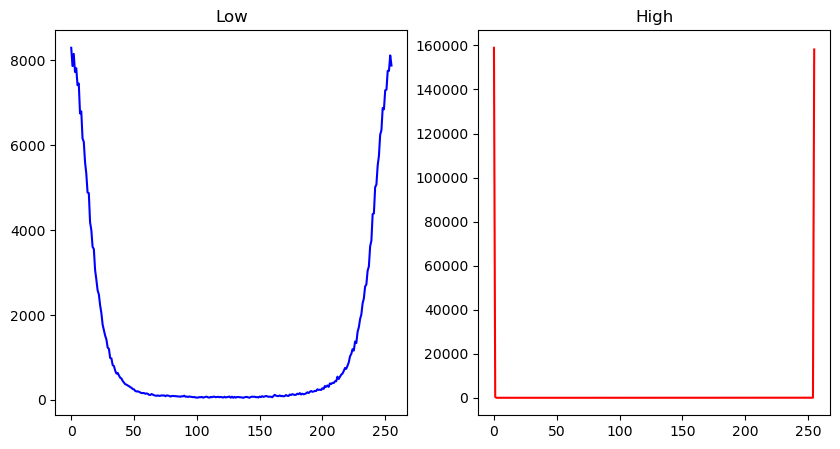

In [8]:
error = transform_signal_to_error(signal_data[0])
low_histogram, high_histogram = get_splitted_histograms(error,8)
plot_histograms(low_histogram, high_histogram)
print(low_histogram.get_data())

In [9]:
code = transform_error_to_code(error)

/tmp/ipykernel_896099/3063061243.py:5: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 65535 to int16 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  high_mask = np.int16(0xFFFF) ^ low_mask


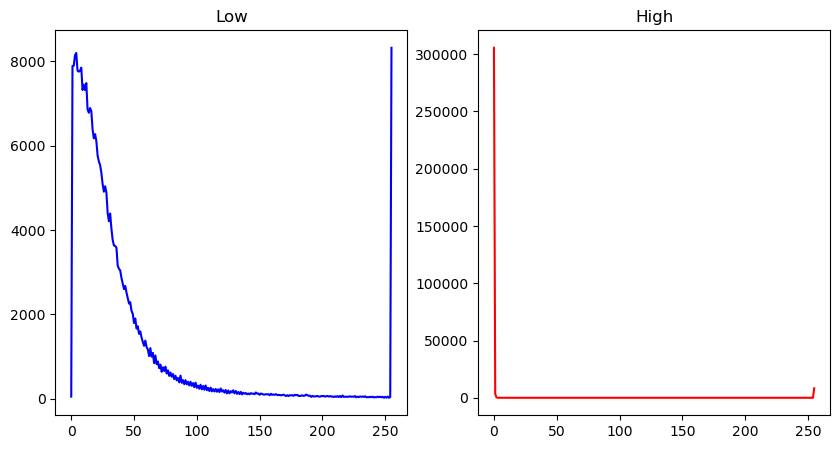

In [10]:
low_histogram, high_histogram = get_splitted_histograms(code,8)
plot_histograms(low_histogram, high_histogram)